In [1]:
from tcrpeg.TCRpeg import TCRpeg
from tcrpeg.classification import classification
import pandas as pd
import numpy as np
import os
from evaluate import evaluation
from tcrpeg.utils import plotting
from tcrpeg.word2vec import word2vec

In [3]:
word2vec(tcrs,30,10,'cuda:0',lr=0.0001,window_size=2)

  0%|          | 561/158751 [00:00<00:56, 2798.94it/s]

Loss at epo 0: 16.482931383189655


 70%|███████   | 111199/158751 [00:40<00:17, 2757.12it/s]


KeyboardInterrupt: 

In [2]:
tcrs = pd.read_csv('data/classification/tumor_train_caTCR.txt',names=['seq'])['seq'].values
model = TCRpeg(hidden_size=64,num_layers = 3,load_data=True,embedding_path='data/embedding_32.txt',path_train=tcrs)
model.create_model()

Have loaded the data, total training seqs : 27137


In [4]:
model.train_tcrpeg(30,1000,1e-3)

  0%|          | 0/27 [00:00<?, ?it/s]

begin the training process
False
begin epoch : 1
nll_loss: 42.42367086226851
begin epoch : 2


 41%|████      | 11/27 [00:00<00:00, 106.06it/s]

nll_loss: 33.40695869502314
begin epoch : 3


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 29.089841145833336
begin epoch : 4
nll_loss: 26.393405888310188
begin epoch : 5


 41%|████      | 11/27 [00:00<00:00, 103.49it/s]

nll_loss: 24.964813874421292
begin epoch : 6


 41%|████      | 11/27 [00:00<00:00, 103.65it/s]

nll_loss: 23.987964626736108
begin epoch : 7


 41%|████      | 11/27 [00:00<00:00, 103.89it/s]

nll_loss: 23.266044632523148
begin epoch : 8


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 22.745249204282405
begin epoch : 9
nll_loss: 22.31723878761574
begin epoch : 10


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 21.908536603009264
begin epoch : 11
nll_loss: 21.520654586226854
begin epoch : 12


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 21.192629267939814
begin epoch : 13
nll_loss: 20.916455512152783
begin epoch : 14


 41%|████      | 11/27 [00:00<00:00, 104.81it/s]

nll_loss: 20.69659150752315
begin epoch : 15


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 20.535827690972223
begin epoch : 16
nll_loss: 20.40168041087963
The learning rate has beed reduced
begin epoch : 17


 41%|████      | 11/27 [00:00<00:00, 104.01it/s]

nll_loss: 20.320478370949072
begin epoch : 18


 41%|████      | 11/27 [00:00<00:00, 103.87it/s]

nll_loss: 20.297752748842594
begin epoch : 19


 41%|████      | 11/27 [00:00<00:00, 104.03it/s]

nll_loss: 20.27745580150463
begin epoch : 20


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 20.252556206597227
begin epoch : 21
nll_loss: 20.23436234085648
begin epoch : 22


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 20.212947916666668
begin epoch : 23
nll_loss: 20.193276909722226
begin epoch : 24


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 20.176513093171298
begin epoch : 25
nll_loss: 20.15191464120371
begin epoch : 26


 41%|████      | 11/27 [00:00<00:00, 106.77it/s]

nll_loss: 20.137242404513888
begin epoch : 27


  0%|          | 0/27 [00:00<?, ?it/s]

nll_loss: 20.119406467013892
begin epoch : 28
nll_loss: 20.09932175925926
begin epoch : 29


 41%|████      | 11/27 [00:00<00:00, 106.33it/s]

nll_loss: 20.08564662905093
begin epoch : 30


100%|██████████| 27/27 [00:00<00:00, 127.36it/s]

nll_loss: 20.066784071180557
Done training


In [5]:
Plot = plotting()
eva = evaluation(model=model)

In [6]:
_,p_data,p_infer = eva.eva_prob(tcrs)

ValueError: Invalid file path or buffer object type: <class 'numpy.ndarray'>

In [8]:
def plot_prob(p_data,p_infer,save_path=None):
    fig=plt.figure(figsize=(3.5,2),dpi=200)
    ax1=plt.subplot(111)
    ax1.set_ylim([-21,0])
    ax1.set_xlim([-5.5,-2.5])
    ax1.locator_params(nbins=4)
    ax1.set_xlabel(r'$log_{10}P_{data}$')
    ax1.set_ylabel(r'$log_{10}P_{infer}$')
    ax1.plot([-5.5, -2.5], [-5.5, -2.5], color='k', linestyle='-', linewidth=2)
    #Plot.density_scatter(np.log10(p_data),np.log10(p_tcrpeg),bins = [10,50],ax=ax1,fig_name='prob_tcrpeg',method='TCRpeg')
    Plot.density_scatter(np.log10(p_data),np.log10(p_infer),bins = [10,50],ax=ax1,fig_name='prob_tcrpeg',method='TCRpeg')
    r = pr(p_data,p_infer)[0]    
    ax1.text(0.65, 0.32, r'r = %0.3f' % (r) , ha='center', va='center',transform = ax1.transAxes,size=10,color='k')
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path+'.jpg',dpi=200)
    else :
        plt.show()

In [12]:
d = pd.read_csv('../../nlp_vae/data/pdf_test_sonnia.csv',nrows=10,compression='gzip')

In [14]:
list(d['count'])

[1, 3, 2, 13, 6, 1, 1, 51, 1, 1]

In [1]:
# from tcrpeg.TCRpeg import TCRpeg
# from tcrpeg.classification import classification
# import pandas as pd
# import numpy as np
# import os
# from evaluate import evaluation
# from tcrpeg.utils import plotting
# import matplotlib.pyplot as plt
# from scipy.stats import pearsonr as pr
# from collections import defaultdict

# tcrs = pd.read_csv('data/classification/tumor_train_caTCR.txt',names=['seq'])['seq'].values
# model = TCRpeg(hidden_size=64,num_layers = 3,load_data=True,embedding_path='data/embedding_32.txt',path_train=tcrs)
# model.create_model()

# model.train_tcrpeg(30,16,1e-3)

# Plot = plotting()
# eva = evaluation(model=model)

# data = {'seq':tcrs,'count':np.random.randint(0,200,size=len(tcrs))} #here
# _,p_data,p_infer = eva.eva_prob(data)
# plot_prob(p_data,p_infer)

In [12]:
Plot

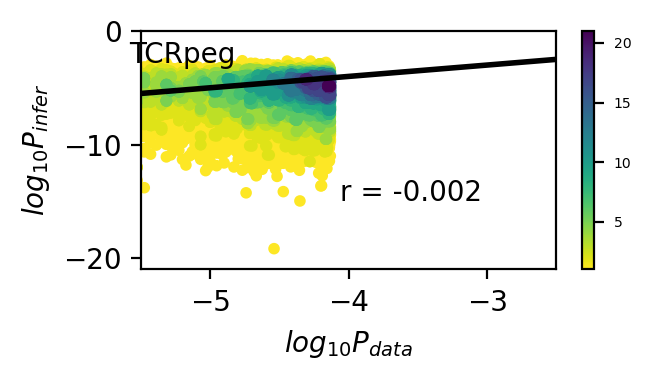

In [9]:
from scipy.stats import pearsonr as pr
plot_prob(p_data,p_infer)

In [10]:
gens = model.generate_tcrpeg(10000,1000)

100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


In [40]:
def length_dis(seqs1:list,seqs2 :list,save_path=None):
    lens1 = [seq for seq in seqs1 if Plot.valid_seq(seq)]
    lens1,lens2 = [len(seq) for seq in seqs1],[len(seq) for seq in seqs2]
    len2count1,len2count2 = defaultdict(int),defaultdict(int)
    for i in range(len(lens1)):        
        len2count1[lens1[i]] += 1
    for i in range(len(lens2)):
        len2count2[lens2[i]] += 1
    k1,k2 = list(len2count1.keys()),list(len2count2.keys())
    x_axis = list(range(1,31))
    fre1,fre2 = [len2count1[k]/len(lens1) for k in x_axis],[len2count2[k]/len(lens2) for k in x_axis]
    plt.figure()
    plt.plot(x_axis,fre1,x_axis,fre2)
    plt.legend(['Data','Generated'])
    plt.xlabel('TCR Length')
    plt.ylabel('Frequency')
    if save_path is not None:
        plt.savefig(save_path+ '.png')
    else :
        plt.show()

In [15]:
#from collections import defaultdict
# Plot.length_dis(tcrs,gens)
Plot.length_dis(tcrs,gens)

NameError: name 'Plot' is not defined

In [57]:
aas = 'ACDEFGHIKLMNPQRSTVWY'
aa2idx = {aas[i]:i for i in range(len(aas))}
idx2aa = {v: k for k, v in aa2idx.items()}
def aas_dis(seqs1:list,seqs2:list,save_path = None):
    #assert len(seqs1) == len(seqs2), 'len1 should be equal to len2'
    aa2pos_dic1 = [defaultdict(int) for _ in range(20)]
    aa2pos_dic2 = [defaultdict(int) for _ in range(20)]
    for i in range(len(seqs1)):
        seq1 = seqs1[i]
        if len(seq1) <= 2 or seq1[0] != 'C' or (seq1[-1] != 'F' and seq1[:-2] != 'YV'):
            continue
        for j,aa in enumerate(seq1):
            #if aa == 'e' or 
            aa2pos_dic1[aa2idx[aa]][j+1] += 1
    for i in range(len(seqs2)):
        seq2 = seqs2[i]
        for j,aa in enumerate(seq2):
            aa2pos_dic2[aa2idx[aa]][j+1] += 1
    
    fig,axs = plt.subplots(4,5,figsize=(16,16))
    x_axis = list(range(1,31))
    for row in range(4):
        for col in range(5):
            index = row*5 + col
            d1,d2,aa = aa2pos_dic1[index],aa2pos_dic2[index],idx2aa[index]
            y1,y2 = [d1[k] for k in x_axis],[d2[k] for k in x_axis]
            sum1,sum2 = sum(y1),sum(y2)            
            y1,y2 = [k/sum1 for k in y1],[k/sum2 for k in y2]
            axs[row,col].plot(x_axis,y1,x_axis,y2)
#             axs[row,col].set_title(str(aa) +' kl: ' +str(kl))
            axs[row,col].legend(['Data','Generated'])
            axs[row,col].set_title('AA: ' + self.aas[index])
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path +  '.png')
    else :
        plt.show()

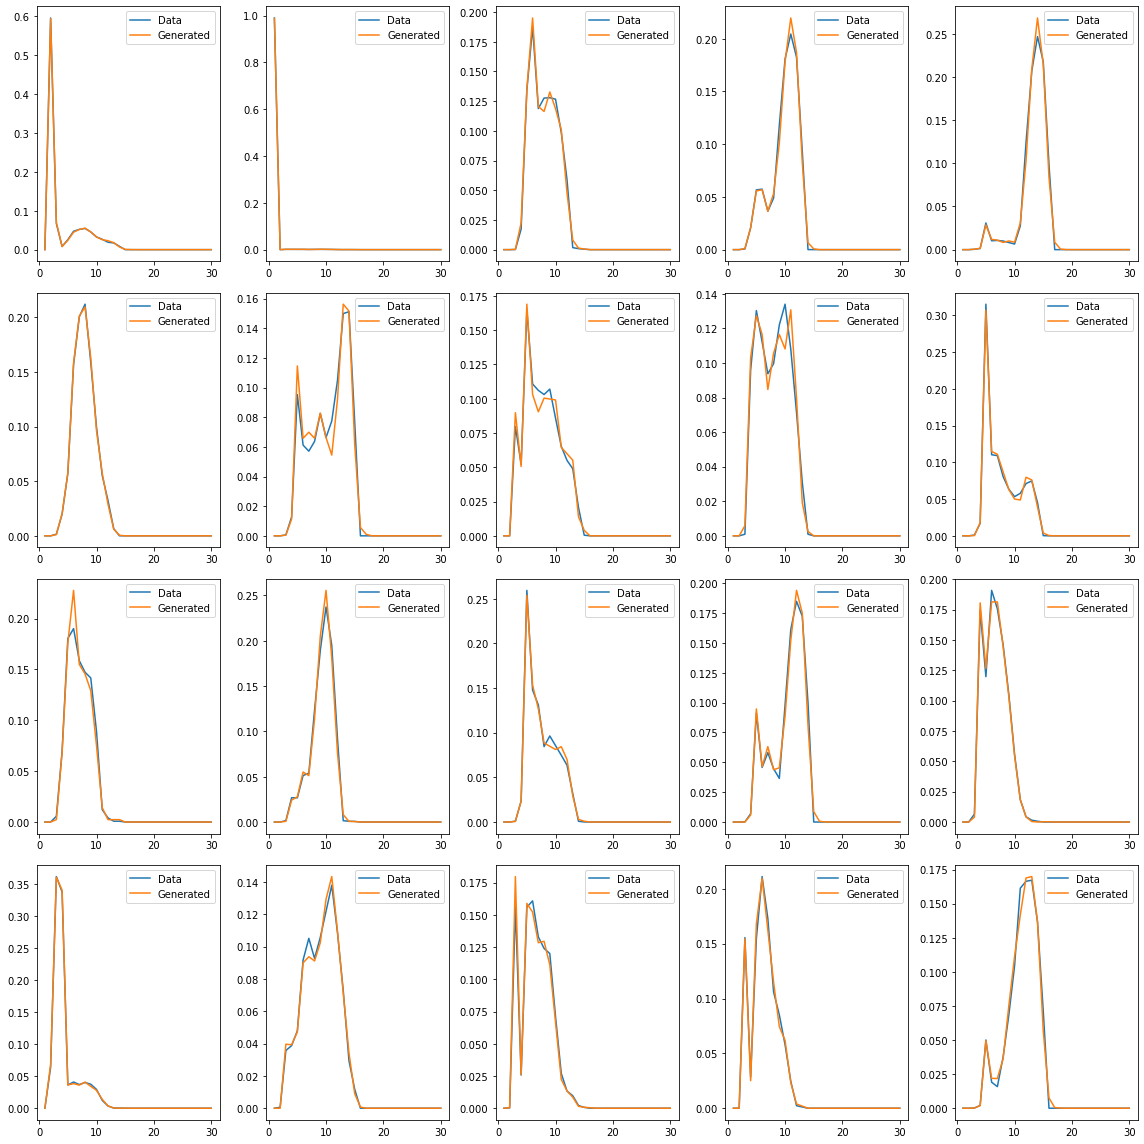

In [58]:
aas_dis(tcrs,gens)

100%|██████████| 21/21 [00:00<00:00, 79.99it/s]


Pearson correlation coefficient are : 0.9197


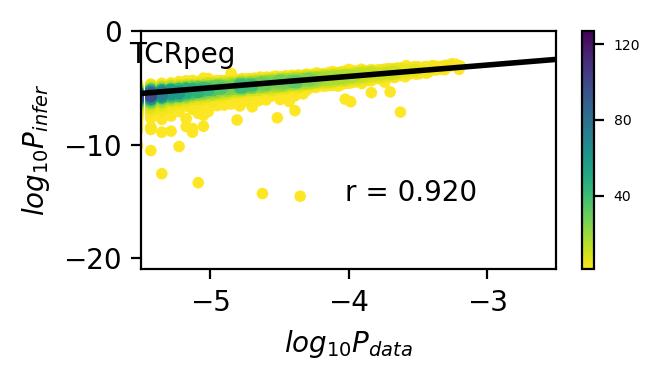

In [3]:
from tcrpeg.TCRpeg import TCRpeg
from tcrpeg.classification import classification
import pandas as pd
import numpy as np
import os
from evaluate import evaluation
from tcrpeg.utils import plotting
import matplotlib.pyplot as plt
from collections import defaultdict

# #tcrs = pd.read_csv('data/classification/tumor_train_caTCR.txt',names=['seq'])['seq'].values
# tcrs_train = pd.read_csv('data/TCRs_train.csv',compression='gzip')['seq'].values
# #tcrs,count = data['seq'].values,data['count'].values
# model = TCRpeg(hidden_size=64,num_layers = 3,load_data=True,embedding_path='data/embedding_32.txt',path_train=tcrs_train)
# model.create_model()

# model.train_tcrpeg(20,64,1e-3)

# Plot = plotting()
# eva = evaluation(model=model)

# test_data = pd.read_csv('data/pdf_test.csv',compression='gzip')
# data = {'seq':test_data['seq'].values,'count':test_data['count'].values} #here
# _,p_data,p_infer = eva.eva_prob(data)
# Plot.plot_prob(p_data,p_infer)

# #gen
# gens = model.generate_tcrpeg(10000,1000)
# Plot.Length_Dis(tcrs,gens)
# Plot.AAs_Dis(tcrs,gens)

# #get_embedding
# embs = model.get_embedding(tcrs[:10])

# #classification
# tcrpeg_c = classification(model,64*3,dropout=0.4)
# tcrpeg_c.train(x_train,y_train,30,8,1e-3,val_split=0.2)
# auc,aup,y_pres,y_trues = tcrpeg_c.evaluate(x_test,y_test,100)


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


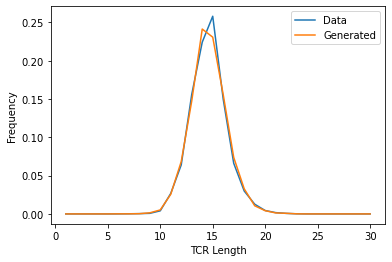

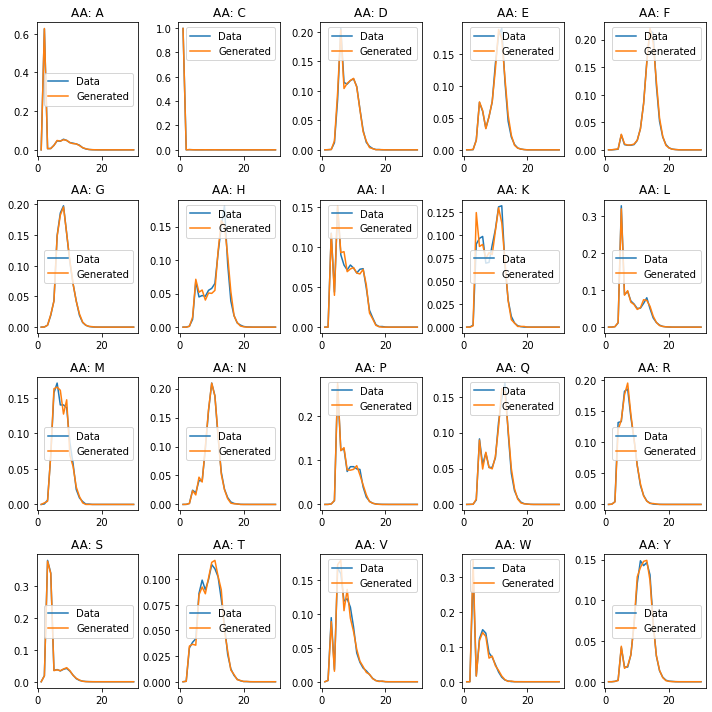

In [5]:
#gen
gens = model.generate_tcrpeg(10000,1000)
Plot.Length_Dis(tcrs_train,gens)
Plot.AAs_Dis(tcrs_train,gens)

#get_embedding
embs = model.get_embedding(tcrs_train[:10])

# #classification
# tcrpeg_c = classification(model,64*3,dropout=0.4)
# tcrpeg_c.train(x_train,y_train,30,8,1e-3,val_split=0.2)
# auc,aup,y_pres,y_trues = tcrpeg_c.evaluate(x_test,y_test,100)